In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("/kaggle/input/rossmann-store-sales/train.csv", low_memory=False)
store = pd.read_csv('/kaggle/input/rossmann-store-sales/store.csv')

In [3]:
data = pd.merge(train, store, on="Store")

In [4]:
data.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
train.shape, store.shape, data.shape

((1017209, 9), (1115, 10), (1017209, 18))

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [7]:
data.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [8]:
missing_percent = data.isnull().mean()*100
missing_percent[missing_percent>0].sort_values(ascending=False)

Promo2SinceYear              49.943620
Promo2SinceWeek              49.943620
PromoInterval                49.943620
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
CompetitionDistance           0.259730
dtype: float64

In [9]:
data.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [10]:
categorical_col = data.select_dtypes(include=['object']).columns.tolist()
categorical_col

['Date', 'StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']

In [11]:
numerical_col = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_col

['Store',
 'DayOfWeek',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear']

In [12]:
# fill competition distance with max valueabs

data['CompetitionDistance'].fillna(data['CompetitionDistance'].max()+1, inplace = True)

/tmp/ipykernel_35/1293000557.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CompetitionDistance'].fillna(data['CompetitionDistance'].max()+1, inplace = True)


In [13]:
# Fill missing dates with 0

data_cols = ['CompetitionOpenSinceMonth',
             'CompetitionOpenSinceYear',
             'Promo2SinceWeek',
             'Promo2SinceYear']

for col in data_cols:
    data[col].fillna(0, inplace=True)

/tmp/ipykernel_35/1739156240.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(0, inplace=True)


In [14]:
# Fill promo Interval with Noneabs

data['PromoInterval'].fillna('None', inplace=True)

/tmp/ipykernel_35/3319343288.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['PromoInterval'].fillna('None', inplace=True)


In [15]:
data.isnull().sum().sum()

0

<h2 style='color:green;'>Sales Distribution</h2>

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


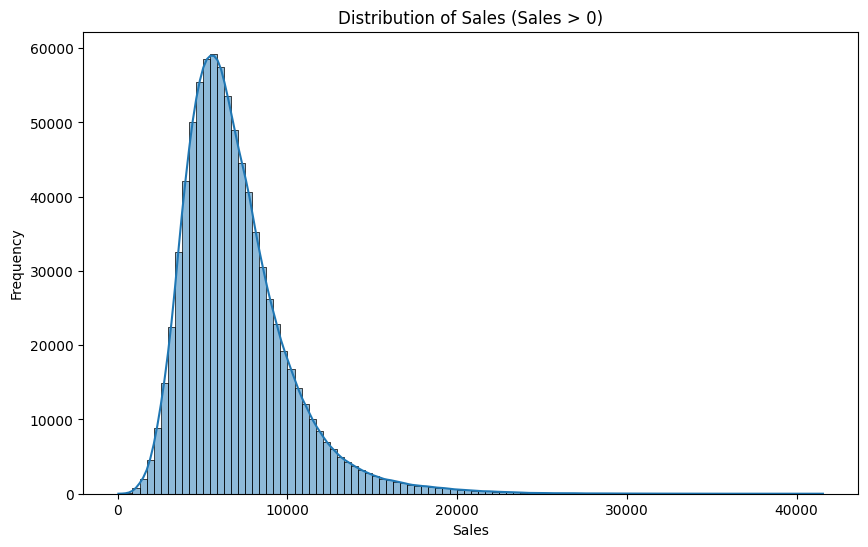

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Sales'] > 0]['Sales'], bins=100, kde=True)
plt.title('Distribution of Sales (Sales > 0)')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

<h2 style='color:green'>Store-wise average sales</h2>

In [17]:
store_avg_sale = data.groupby('Store')['Sales'].mean().reset_index()

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='Store', y='Sales', data=store_avg_sale)
plt.xlabel("Store")
plt.ylabel('Average Sales')
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


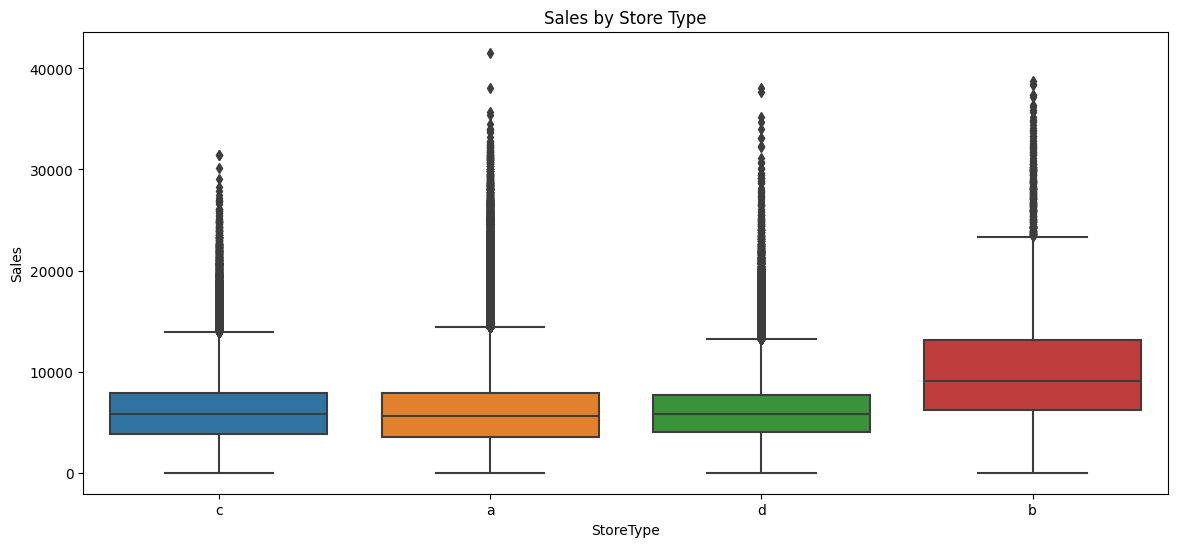

In [19]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=data, x='StoreType', y='Sales')
plt.title('Sales by Store Type')
plt.show()

<h2 style='color:green'>Sales vs. Promo</h2>

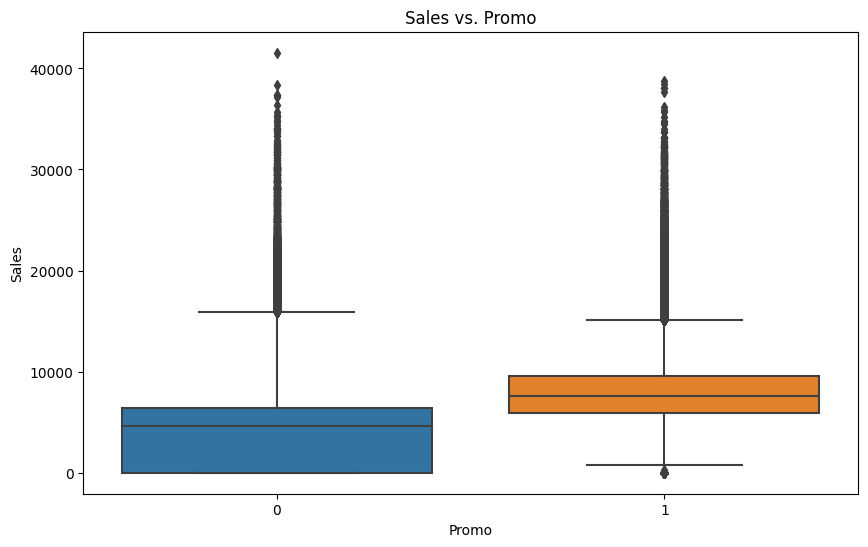

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promo', y ='Sales', data=data)
plt.title('Sales vs. Promo')
plt.xlabel('Promo')
plt.ylabel('Sales')
plt.show()

<h2 style='color:green'>Sales vs. Day of Week</h2>

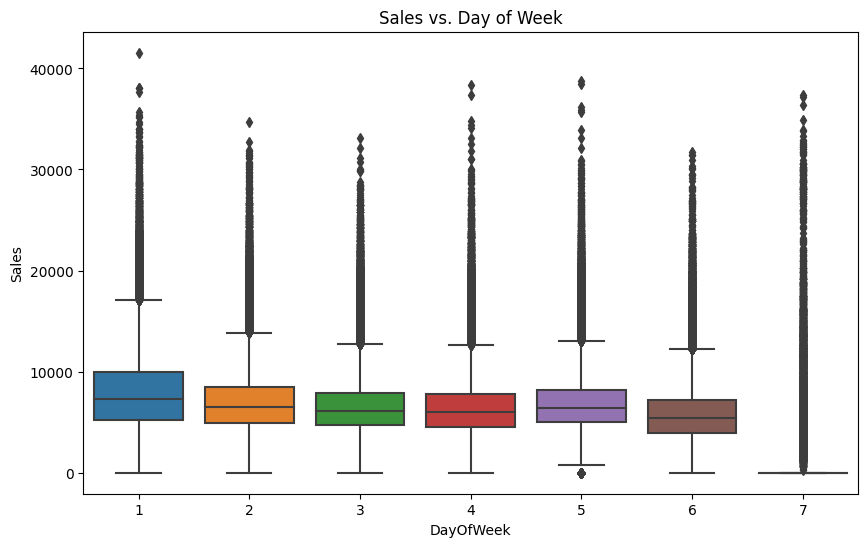

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='DayOfWeek', y ='Sales', data=data)
plt.title('Sales vs. Day of Week')
plt.xlabel('DayOfWeek')
plt.ylabel('Sales')
plt.show()

<h2 style='color:green'>Sales vs. School Holiday</h2>

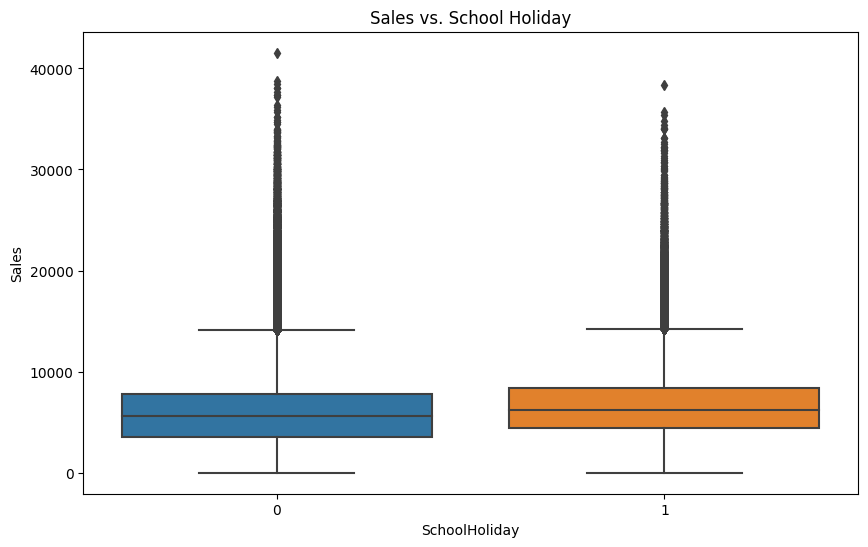

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='SchoolHoliday', y ='Sales', data=data)
plt.title('Sales vs. School Holiday')
plt.xlabel('SchoolHoliday')
plt.ylabel('Sales')
plt.show()

<h1 style='color:green'>Convert Date and Extract Feature</h1>

In [23]:
data['Date'] = pd.to_datetime(data['Date'])

In [24]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['WeekOfYear'] = data['Date'].dt.isocalendar().week 

<h2 style='color:green'>Create New Feature</h2>

In [25]:
import datetime

data['PromoInterval'] = data['PromoInterval'].fillna('None').astype(str)

data['PromoInterval'] = data['PromoInterval'].str.replace('Sept', 'Sep')

def is_promo_month(row):
    promo_interval = row['PromoInterval'].strip()
    
    if promo_interval == 'None':
        return 0

    try:
        promo_months = [datetime.datetime.strptime(m.strip(), "%b").month for m in promo_interval.split(',')]
        return 1 if row['Month'] in promo_months else 0
    except Exception as e:
        print(f"Error on row: {row['PromoInterval']} → {e}")
        return 0

data['IsPromoMonth'] = data.apply(is_promo_month, axis=1)


In [26]:
data['CompetitionOpenTimeInMonths'] = 12 * (data['Year'] - data['CompetitionOpenSinceYear']) + \
                                       (data['Month'] - data['CompetitionOpenSinceMonth'])
data['CompetitionOpenTimeInMonths'] = data['CompetitionOpenTimeInMonths'].apply(lambda x: x if x > 0 else 0)

In [27]:
data['Promo2OpenTimeInWeeks'] = 52 * (data['Year'] - data['Promo2SinceYear']) + \
                                 (data['WeekOfYear'] - data['Promo2SinceWeek'])
data['Promo2OpenTimeInWeeks'] = data['Promo2OpenTimeInWeeks'].apply(lambda x: x if x > 0 else 0)

In [28]:
data.dtypes

Store                                   int64
DayOfWeek                               int64
Date                           datetime64[ns]
Sales                                   int64
Customers                               int64
Open                                    int64
Promo                                   int64
StateHoliday                           object
SchoolHoliday                           int64
StoreType                              object
Assortment                             object
CompetitionDistance                   float64
CompetitionOpenSinceMonth             float64
CompetitionOpenSinceYear              float64
Promo2                                  int64
Promo2SinceWeek                       float64
Promo2SinceYear                       float64
PromoInterval                          object
Year                                    int32
Month                                   int32
Day                                     int32
WeekOfYear                        

In [29]:
data[['StoreType', 'Assortment', 'StateHoliday']]

,StoreType,Assortment,StateHoliday
0,c,a,0
1,a,a,0
2,a,a,0
3,c,c,0
4,a,a,0
...,...,...,...
1017204,a,a,a
1017205,c,c,a
1017206,a,c,a
1017207,a,c,a


<h2 style="color:green">Encode Categorical Data</h2>

In [30]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for col in ['StoreType', 'Assortment', 'StateHoliday']:
    data[col] = label.fit_transform(data[col])

<h2 style='color:green'>Create Lag/Roll Feature</h2>

In [31]:
data.sort_values(['Store', 'Date'], inplace=True)

In [32]:
# Lag of 1 day
data['Sales_Lag1'] = data.groupby('Store')['Sales'].shift(1)

# Lag of 7 days
data['Sales_Lag7'] = data.groupby('Store')['Sales'].shift(7)

In [33]:
# 3-day rolling mean
data['Sales_RollingMean3'] = data.groupby('Store')['Sales'].shift(1).rolling(window=3).mean()

# 7-day rolling mean
data['Sales_RollingMean7'] = data.groupby('Store')['Sales'].shift(1).rolling(window=7).mean()

In [34]:
data.dropna(subset=['Sales_Lag1', 'Sales_Lag7', 'Sales_RollingMean3', 'Sales_RollingMean7'], inplace=True)

In [35]:
data['IsHolidayWeek'] = ((data['SchoolHoliday'] == 1) | (data['StateHoliday'] != 0)).astype(int)

In [36]:
from dateutil.relativedelta import relativedelta

data['CompetitionOpenSinceYear'] = data['CompetitionOpenSinceYear'].fillna(0).astype(int)
data['CompetitionOpenSinceMonth'] = data['CompetitionOpenSinceMonth'].fillna(0).astype(int)

data['CompetitionOpenSince'] = pd.to_datetime({
    'year': data['CompetitionOpenSinceYear'],
    'month': data['CompetitionOpenSinceMonth'],
    'day': 1
}, errors='coerce')

def calc_month_diff(current_date, past_date):
    if pd.isnull(past_date):
        return 0
    delta = relativedelta(current_date, past_date)
    return max(0, delta.years * 12 + delta.months)

data['CompetitionOpenTimeMonths'] = data.apply(
    lambda row: calc_month_diff(row['Date'], row['CompetitionOpenSince']), axis=1
)


In [37]:
# First convert Promo2 start to datetime
data['Promo2Since'] = pd.to_datetime(data['Promo2SinceYear'].astype(int).astype(str) + '-' +
                                     data['Promo2SinceWeek'].astype(int).astype(str) + '-1',
                                     format='%Y-%W-%w', errors='coerce')

# Calculate promo2 open time
data['Promo2OpenTimeWeeks'] = ((data['Date'] - data['Promo2Since']) / np.timedelta64(1, 'W')).astype(float)
data['Promo2OpenTimeWeeks'] = data['Promo2OpenTimeWeeks'].apply(lambda x: x if x > 0 else 0)

In [38]:
data.drop(['Date', 'PromoInterval', 'Customers'], axis=1, inplace=True)

In [39]:
clean_data = data[(data['Open'] == 1) & (data['Sales'] > 0)]

In [40]:
selected_features = [
    # Basic info
    'Store', 'DayOfWeek', 'Promo', 'SchoolHoliday', 'StateHoliday', 'StoreType',
    'Assortment', 'CompetitionDistance', 'Promo2',

    # Date-based features
    'Year', 'Month', 'Day', 'WeekOfYear',

    # Engineered features
    'IsPromoMonth', 'IsHolidayWeek',
    'CompetitionOpenTimeMonths', 'Promo2OpenTimeWeeks',
    
    # Lag & rolling
    'Sales_Lag1', 'Sales_Lag7',
    'Sales_RollingMean3', 'Sales_RollingMean7',

    #Targer Variable
    'Sales'
]

In [41]:
cleanned_data = clean_data[selected_features]

In [42]:
cleanned_data.to_csv('Cleanned_data.csv', index=False)

<h1 style='color:green'>Import Cleaned Data</h1>

In [43]:
import pandas as pd
df = pd.read_csv("Cleanned_data.csv")
df.head(3)

,Store,DayOfWeek,Promo,SchoolHoliday,StateHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,...,WeekOfYear,IsPromoMonth,IsHolidayWeek,CompetitionOpenTimeMonths,Promo2OpenTimeWeeks,Sales_Lag1,Sales_Lag7,Sales_RollingMean3,Sales_RollingMean7,Sales
0,1,2,1,1,0,2,0,1270.0,0,2013,...,2,0,1,52,0.0,7176.0,0.0,4057.666667,3788.000000,5580
1,1,3,1,1,0,2,0,1270.0,0,2013,...,2,0,1,52,0.0,5580.0,5530.0,4252.000000,4585.142857,5471
2,1,4,1,1,0,2,0,1270.0,0,2013,...,2,0,1,52,0.0,5471.0,4327.0,6075.666667,4576.714286,4892


In [44]:
df.tail()

,Store,DayOfWeek,Promo,SchoolHoliday,StateHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,...,WeekOfYear,IsPromoMonth,IsHolidayWeek,CompetitionOpenTimeMonths,Promo2OpenTimeWeeks,Sales_Lag1,Sales_Lag7,Sales_RollingMean3,Sales_RollingMean7,Sales
838755,1115,1,1,1,0,3,2,5350.0,1,2015,...,31,0,1,0,165.000000,0.0,6083.0,4237.666667,5051.714286,10712
838756,1115,2,1,1,0,3,2,5350.0,1,2015,...,31,0,1,0,165.142857,10712.0,5074.0,5869.666667,5713.000000,8093
838757,1115,3,1,1,0,3,2,5350.0,1,2015,...,31,0,1,0,165.285714,8093.0,5342.0,6268.333333,6144.285714,7661
838758,1115,4,1,1,0,3,2,5350.0,1,2015,...,31,0,1,0,165.428571,7661.0,6150.0,8822.000000,6475.571429,8405
838759,1115,5,1,1,0,3,2,5350.0,1,2015,...,31,0,1,0,165.571429,8405.0,5816.0,8053.000000,6797.714286,8680


In [45]:
df.isnull().sum()

Store                        0
DayOfWeek                    0
Promo                        0
SchoolHoliday                0
StateHoliday                 0
StoreType                    0
Assortment                   0
CompetitionDistance          0
Promo2                       0
Year                         0
Month                        0
Day                          0
WeekOfYear                   0
IsPromoMonth                 0
IsHolidayWeek                0
CompetitionOpenTimeMonths    0
Promo2OpenTimeWeeks          0
Sales_Lag1                   0
Sales_Lag7                   0
Sales_RollingMean3           0
Sales_RollingMean7           0
Sales                        0
dtype: int64

In [46]:
df.shape

(838760, 22)

In [47]:
df.describe()

,Store,DayOfWeek,Promo,SchoolHoliday,StateHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,...,WeekOfYear,IsPromoMonth,IsHolidayWeek,CompetitionOpenTimeMonths,Promo2OpenTimeWeeks,Sales_Lag1,Sales_Lag7,Sales_RollingMean3,Sales_RollingMean7,Sales
count,838760.000000,838760.000000,838760.000000,838760.000000,838760.000000,838760.000000,838760.000000,838760.000000,838760.000000,838760.000000,...,838760.000000,838760.000000,838760.000000,838760.000000,838760.000000,838760.000000,838760.000000,838760.000000,838760.000000,838760.000000
mean,558.423585,3.518455,0.448004,0.190788,0.001404,1.205395,0.936583,5640.755342,0.498586,2013.837478,...,23.796235,0.171124,0.191496,42.007931,56.849670,5803.658755,6680.320746,5691.647431,5775.230858,6958.151694
std,321.731282,1.723534,0.497289,0.392922,0.047499,1.363356,0.993108,8581.540290,0.499998,0.776875,...,14.320354,0.376618,0.393479,65.199241,82.649987,3961.303062,3279.838243,2762.752301,2307.491848,3103.226861
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,2013.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000
25%,280.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,710.000000,0.000000,2013.000000,...,12.000000,0.000000,0.000000,0.000000,0.000000,3766.000000,4670.000000,3805.666667,4247.285714,4862.000000
50%,558.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2330.000000,0.000000,2014.000000,...,23.000000,0.000000,0.000000,16.000000,0.000000,5835.000000,6224.000000,5166.333333,5362.571429,6372.000000
75%,837.000000,5.000000,1.000000,0.000000,0.000000,3.000000,2.000000,6910.000000,1.000000,2014.000000,...,35.000000,0.000000,0.000000,73.000000,108.571429,7969.000000,8215.000000,6954.666667,6760.714286,8362.000000
max,1115.000000,7.000000,1.000000,1.000000,3.000000,3.000000,2.000000,75861.000000,1.000000,2015.000000,...,52.000000,1.000000,1.000000,1386.000000,312.571429,41551.000000,41551.000000,34312.666667,29380.428571,41551.000000


<h2 style='color:green'>Train/Test Split</h2>

In [48]:
x = df.drop(['Sales'], axis=1)
y = df['Sales']

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [51]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((671008, 21), (671008,), (167752, 21), (167752,))

<h2 style='color:green'>Model training: Linear Regression</h2>

In [52]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

lr.score(x_train, y_train)*100, lr.score(x_test, y_test)*100

(69.54694341393687, 69.72641162850982)

In [53]:
y_pred_lr = lr.predict(x_test)

In [54]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = mean_squared_error(y_test, y_pred_lr, squared=False)
r2 = r2_score(y_test, y_pred_lr)

print("RMSE:", rmse)
print("R² Score:", r2)

RMSE: 1702.8980020535419
R² Score: 0.6972641162850982


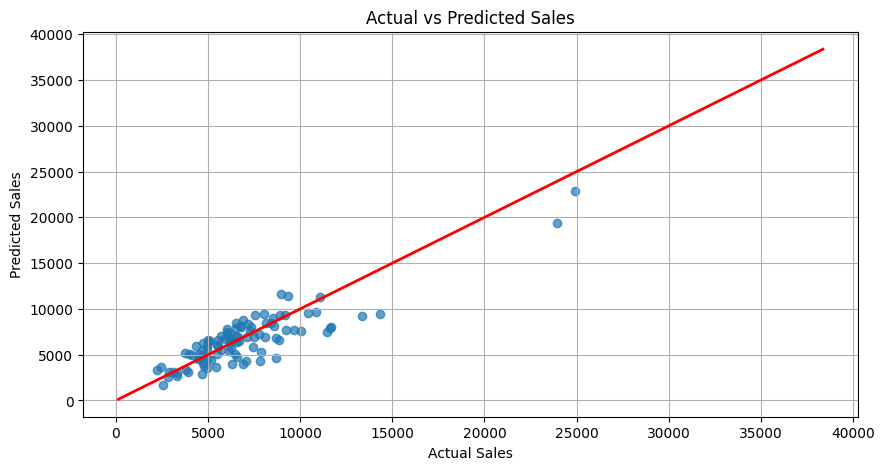

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(y_test[:100], y_pred_lr[:100], alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()


<h2 style='color:green'>Random Forest</h2>

In [56]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(x_train, y_train)

rf.score(x_train, y_train)*100, rf.score(x_test, y_test)*100

(99.01217774431669, 92.89579416184213)

In [57]:
y_pred_rf = rf.predict(x_test)

In [58]:
rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
r2 = r2_score(y_test, y_pred_rf)

print("RMSE:", rmse)
print("R² Score:", r2)

RMSE: 824.924976932382
R² Score: 0.9289579416184213


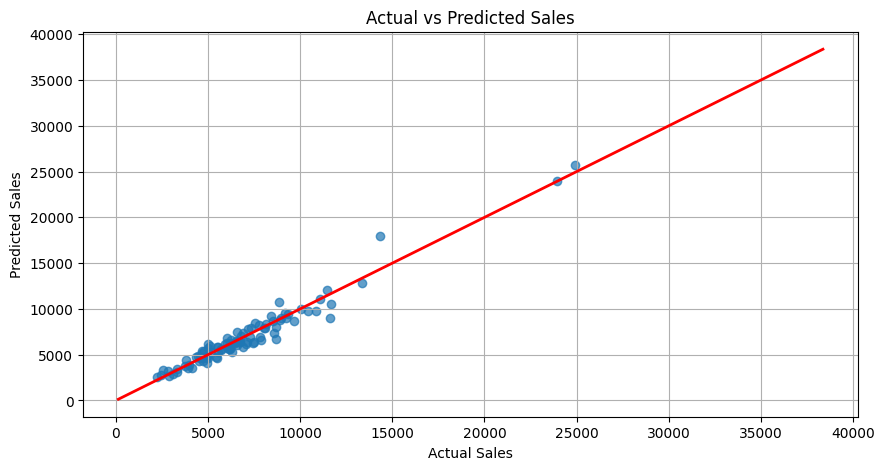

In [59]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test[:100], y_pred_rf[:100], alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()

<h2 style='color:green'>XGBoost Regressor</h2>

In [60]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgb.fit(x_train, y_train)
xgb.score(x_train, y_train)*100, xgb.score(x_test, y_test)*100

(93.42835628384769, 92.8339303709615)

In [61]:
y_pred_xgb = xgb.predict(x_test)

In [62]:
rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2 = r2_score(y_test, y_pred_xgb)

print("RMSE:", rmse)
print("R² Score:", r2)

RMSE: 828.5089361439548
R² Score: 0.928339303709615


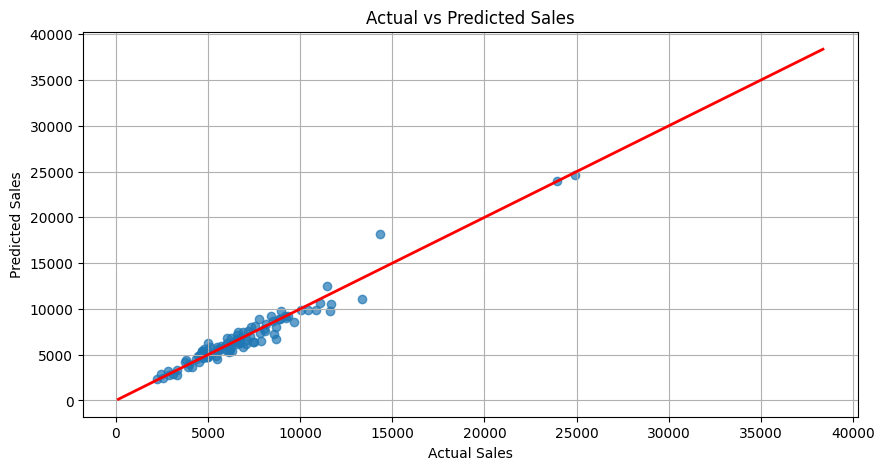

In [63]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test[:100], y_pred_xgb[:100], alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()

<h2 style="color:green">Tuning XGBoost</h2> 

In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [6, 8, 10],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid.fit(x_train, y_train)

print("Best RMSE:", -grid.best_score_)
print("Best Params:", grid.best_params_)


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best RMSE: 742.0269311945676
Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 1.0}


In [65]:
grid_xgb = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=10,
    subsample=1.0,
    colsample_bytree=0.8,
    random_state=42
)
grid_xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [66]:
grid_xgb.score(x_train, y_train)*100, grid_xgb.score(x_test, y_test)*100

(96.13570883782361, 94.46586012938366)

In [67]:
y_pred_xgb_grid = grid_xgb.predict(x_test)

rmse = mean_squared_error(y_test, y_pred_xgb_grid, squared=False)
r2 = r2_score(y_test, y_pred_xgb_grid)

print("RMSE:", rmse)
print("R² Score:", r2)

RMSE: 728.0844417908871
R² Score: 0.9446586012938365


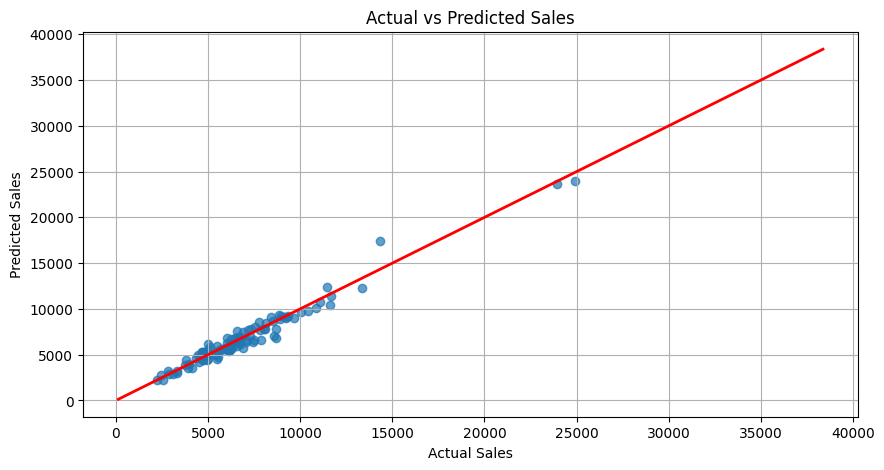

In [68]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test[:100], y_pred_xgb_grid[:100], alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()

<h2 style="color:green">Save the Model</h2> 

In [69]:
import joblib

joblib.dump(grid_xgb, "xgboost_best_params.joblib")

['xgboost_best_params.joblib']

In [70]:
import joblib

model = joblib.load('xgboost_best_params.joblib')

<h2 style="color:green">Predict on Test data</h2>

In [71]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Load test and store data
test = pd.read_csv("/kaggle/input/rossmann-store-sales/test.csv")
store = pd.read_csv("/kaggle/input/rossmann-store-sales/store.csv")

# Merge with store
test = test.merge(store, on='Store', how='left')

In [72]:
# Extract date parts
test['Date'] = pd.to_datetime(test['Date'])

test['Year'] = test['Date'].dt.year
test['Month'] = test['Date'].dt.month
test['Day'] = test['Date'].dt.day
test['WeekOfYear'] = test['Date'].dt.isocalendar().week

In [73]:
# 1. Fill CompetitionDistance with max from training data + 1
max_distance = data['CompetitionDistance'].max()  # calculated from training data
test['CompetitionDistance'].fillna(max_distance + 1, inplace=True)

# 2. Fill year/month/week columns with 0
for col in data_cols:
    test[col].fillna(0, inplace=True)

# 3. Fill PromoInterval with 'None'
test['PromoInterval'].fillna('None', inplace=True)

/tmp/ipykernel_35/4091124252.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['CompetitionDistance'].fillna(max_distance + 1, inplace=True)
/tmp/ipykernel_35/4091124252.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [74]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for col in ['StoreType', 'Assortment', 'StateHoliday']:
    test[col] = label.fit_transform(test[col])

In [75]:
# IsPromoMonth
import datetime

test['PromoInterval'] = test['PromoInterval'].fillna('None').astype(str)

test['PromoInterval'] = test['PromoInterval'].str.replace('Sept', 'Sep')

def is_promo_month(row):
    promo_interval = row['PromoInterval'].strip()
    
    if promo_interval == 'None':
        return 0

    try:
        promo_months = [datetime.datetime.strptime(m.strip(), "%b").month for m in promo_interval.split(',')]
        return 1 if row['Month'] in promo_months else 0
    except Exception as e:
        print(f"Error on row: {row['PromoInterval']} → {e}")
        return 0

test['IsPromoMonth'] = test.apply(is_promo_month, axis=1)


In [76]:
# IsHolidayWeek
test['IsHolidayWeek'] = ((test['SchoolHoliday'] == 1) | (test['StateHoliday'] != 0)).astype(int)

In [77]:
# Lag of 1 day
test['Sales_Lag1'] = data.groupby('Store')['Sales'].shift(1)

# Lag of 7 days
test['Sales_Lag7'] = data.groupby('Store')['Sales'].shift(7)

# 3-day rolling mean
test['Sales_RollingMean3'] = data.groupby('Store')['Sales'].shift(1).rolling(window=3).mean()

# 7-day rolling mean
test['Sales_RollingMean7'] = data.groupby('Store')['Sales'].shift(1).rolling(window=7).mean()

In [78]:
# Competition open time in months
test['CompetitionOpenSinceYear'] = test['CompetitionOpenSinceYear'].fillna(0).astype(int)
test['CompetitionOpenSinceMonth'] = test['CompetitionOpenSinceMonth'].fillna(0).astype(int)

test['CompetitionOpenSince'] = pd.to_datetime({
    'year': test['CompetitionOpenSinceYear'],
    'month': test['CompetitionOpenSinceMonth'],
    'day': 1
}, errors='coerce')

def calc_month_diff(current_date, past_date):
    if pd.isnull(past_date):
        return 0
    delta = relativedelta(current_date, past_date)
    return max(0, delta.years * 12 + delta.months)

test['CompetitionOpenTimeMonths'] = test.apply(
    lambda row: calc_month_diff(row['Date'], row['CompetitionOpenSince']), axis=1
)

In [79]:
# Promo2 open time in weeks
test['Promo2SinceYear'] = test['Promo2SinceYear'].fillna(0).astype(int)
test['Promo2SinceWeek'] = test['Promo2SinceWeek'].fillna(0).astype(int)

test['Promo2Since'] = pd.to_datetime(
    test['Promo2SinceYear'].astype(str) + '-' +
    test['Promo2SinceWeek'].astype(str) + '-1',
    format='%Y-%W-%w', errors='coerce'
)
test['Promo2OpenTimeWeeks'] = ((test['Date'] - test['Promo2Since']).dt.days / 7).apply(lambda x: max(0, x) if pd.notnull(x) else 0)


In [80]:
# Fill missing competition distances (if any)
test['CompetitionDistance'] = test['CompetitionDistance'].fillna(test['CompetitionDistance'].median())

In [81]:
test.dropna(subset=['Sales_Lag1', 'Sales_Lag7', 'Sales_RollingMean3', 'Sales_RollingMean7'], inplace=True)

In [82]:
test_features = [
    # Basic info
    'Store', 'DayOfWeek', 'Promo', 'SchoolHoliday', 'StateHoliday', 'StoreType',
    'Assortment', 'CompetitionDistance', 'Promo2',

    # Date-based features
    'Year', 'Month', 'Day', 'WeekOfYear',

    # Engineered features
    'IsPromoMonth', 'IsHolidayWeek',
    'CompetitionOpenTimeMonths', 'Promo2OpenTimeWeeks',
    
    # Lag & rolling
    'Sales_Lag1', 'Sales_Lag7',
    'Sales_RollingMean3', 'Sales_RollingMean7',
]

In [83]:
# Final input to model
final_test = test[test_features]

In [84]:
final_test.to_csv('final_test.csv', index=False)

In [85]:
clean_test = pd.read_csv('final_test.csv', low_memory=False)

In [86]:
clean_test.isnull().sum()

Store                        0
DayOfWeek                    0
Promo                        0
SchoolHoliday                0
StateHoliday                 0
StoreType                    0
Assortment                   0
CompetitionDistance          0
Promo2                       0
Year                         0
Month                        0
Day                          0
WeekOfYear                   0
IsPromoMonth                 0
IsHolidayWeek                0
CompetitionOpenTimeMonths    0
Promo2OpenTimeWeeks          0
Sales_Lag1                   0
Sales_Lag7                   0
Sales_RollingMean3           0
Sales_RollingMean7           0
dtype: int64

In [87]:
clean_test.head()

,Store,DayOfWeek,Promo,SchoolHoliday,StateHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,...,Day,WeekOfYear,IsPromoMonth,IsHolidayWeek,CompetitionOpenTimeMonths,Promo2OpenTimeWeeks,Sales_Lag1,Sales_Lag7,Sales_RollingMean3,Sales_RollingMean7
0,1,4,1,0,0,2,0,1270.0,0,2015,...,17,38,0,0,84,0.000000,5020.0,3706.0,4937.666667,4140.714286
1,3,4,1,0,0,0,0,14130.0,1,2015,...,17,38,0,0,105,232.428571,5567.0,3854.0,5880.000000,4376.142857
2,7,4,1,0,0,0,2,24000.0,0,2015,...,17,38,0,0,29,0.000000,8977.0,5080.0,8483.666667,6073.714286
3,8,4,1,0,0,0,0,7520.0,0,2015,...,17,38,0,0,11,0.000000,10387.0,8322.0,10392.000000,8661.714286
4,9,4,1,0,0,0,2,2030.0,0,2015,...,17,38,0,0,181,0.000000,4943.0,3815.0,5641.666667,4261.285714


In [88]:
clean_test.dtypes

Store                          int64
DayOfWeek                      int64
Promo                          int64
SchoolHoliday                  int64
StateHoliday                   int64
StoreType                      int64
Assortment                     int64
CompetitionDistance          float64
Promo2                         int64
Year                           int64
Month                          int64
Day                            int64
WeekOfYear                     int64
IsPromoMonth                   int64
IsHolidayWeek                  int64
CompetitionOpenTimeMonths      int64
Promo2OpenTimeWeeks          float64
Sales_Lag1                   float64
Sales_Lag7                   float64
Sales_RollingMean3           float64
Sales_RollingMean7           float64
dtype: object

In [89]:
predictions = model.predict(clean_test)

In [90]:
submission = pd.DataFrame({
    'Id': test['Id'],
    'Sales': predictions
})
submission.to_csv("submission.csv", index=False)

In [91]:
pd.read_csv("submission.csv")

,Id,Sales
0,1,4667.3290
1,2,5446.8880
2,3,7559.2134
3,4,9885.2060
4,5,5013.4940
...,...,...
41083,41084,6801.2266
41084,41085,4764.8677
41085,41086,4446.6600
41086,41087,7724.1494
